# Spotify Sentiment Analysis with Spacy and Spacytextblob

### Beth Harvey

The goal of this project is to use the Spotify API and Spotipy to get the titles of the top 5 songs from Spotify's Top Songs Global playlist, along with several Top Songs playlists for various countries where English is the primary language (only the English NLP package is used). The LyricsGenius API will be used to get the lyrics for each track, then sentiment analysis will be performend on the data using spaCy. Song data will be saved in JSON files, then sentiment analysis will be done using spacy and spacy text blob. 

The playlists are updated weekly and were accessed on August 4-6, 2023.

NOTE: Several of the songs in these playlists contain explicit lyrics. Proceed with caution.


Installations
* pip install -U pip setuptools wheel
* pip install -U spacy
* python -m spacy download en_core_web_sm
* pip install spotipy --upgrade
* pip install lyricsgenius
* pip install python-dotenv
* pip install pandas
* pip install matplotlib

In [85]:
# Import and confirm necessary packages
import json

import requests
import spacy
import os
from spacytextblob.spacytextblob import SpacyTextBlob
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import lyricsgenius
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# print('All prereqs installed.')
# !pip list

## API Credentials
Following the Spotipy instructions at https://spotipy.readthedocs.io/en/2.22.1/ I saved my Spotify client ID, client secret, and redirect URI as environment variables. They need to be loaded in as variables so they are available for use.

In [2]:
# Read in environment variables
load_dotenv()
client_id = os.getenv('SPOTIPY_CLIENT_ID')
client_secret = os.getenv('SPOTIPY_CLIENT_SECRET')
redirect = os.getenv('SPOTIPY_REDIRECT_URI')
genius_token = os.getenv('LYRICS_GENIUS_TOKEN')

## Define Functions

### Get Top Five Tracks From Spotify Playlist Using Spotipy

In [3]:
# Define function to get a list of the top 5 songs from a playlist
def get_top_five(playlist_uri):
    # Initialize Spotipy object
    spotify = spotipy.Spotify(auth_manager = SpotifyClientCredentials())
    # Get details of top 5 songs from playlist
    top_5_songs = spotify.playlist_tracks(playlist_uri, limit = 5)
    # Get main artists and titles of top 5 tracks
    top_5_tracks = []
    full_names = []
    for track in top_5_songs['items']:
        track_artist= track['track']['artists'][0]['name']
        full_track_name = track['track']['name']
        full_names.append(full_track_name)
            # Clean track names (better search results)
        for name in full_names:
            split_1 = name.split(' (')
            split_2 = split_1[0].split(' [')
            track_name = split_2[0]

        track_info = (track_artist, track_name)
        top_5_tracks.append(track_info)
    return top_5_tracks

### Get Song Lyrics From LyricsGenius

In [4]:
# Define function to get lyrics of a song and save as a JSON file
def get_song_lyrics(track_name, track_artist):
    # Initialize LyricsGenius object
    genius = lyricsgenius.Genius(genius_token)
    song_details = genius.search_song(title = track_name, artist = track_artist)
    song_lyrics = song_details.lyrics
    file_name = f'{track_name}.json'
    # Check to see if file already exists before creating new one (some songs are in multiple playlists)
    if not os.path.exists(file_name):
        with open(file_name, 'w') as file:
            json.dump(song_lyrics, file)

### Get Polarity Score For Lyrics Using spaCy

In [5]:
def get_polarity_score(track_name):
    file_name = f'{track_name}.json'
    # Load lyrics from JSON file
    with open(file_name, 'r') as file:
        song_lyrics = json.load(file)
    # Initialize spaCy object
    nlp = spacy.load('en_core_web_sm')
    nlp.add_pipe('spacytextblob')
    # Apply sentiment analysis to lyrics
    sentiment_analysis = nlp(song_lyrics)
    # Get polarity score
    polarity_score = sentiment_analysis._.blob.polarity
    return polarity_score

## Global Top Songs Playlist

### Get Track Names

In [6]:
# Get names of top 5 tracks from Global Top Songs
top_five_global = get_top_five('37i9dQZEVXbNG2KDcFcKOF')
print(top_five_global)

[('Jung Kook', 'Seven'), ('Myke Towers', 'LALA'), ('Travis Scott', 'MELTDOWN'), ('Billie Eilish', 'What Was I Made For?'), ('Travis Scott', 'FE!N')]


### Get Lyrics

In [7]:
# Save lyrics for global top 5 songs
for artist, song in top_five_global:
    get_song_lyrics(song, artist)

Searching for "Seven" by Jung Kook...
Done.
Searching for "LALA" by Myke Towers...
Done.
Searching for "MELTDOWN" by Travis Scott...
Done.
Searching for "What Was I Made For?" by Billie Eilish...
Done.
Searching for "FE!N" by Travis Scott...
Done.


### Sentiment Analysis

In [8]:
# Get polarity scores for Global Top Songs
top_five_global_polarity = [get_polarity_score(song) for artist, song in top_five_global]
print(top_five_global_polarity)

[0.15595238095238093, 0.11666666666666665, -0.16178026834276832, 0.09930555555555556, -0.08304473304473305]


## Top Songs USA

### Get Track Names

In [9]:
top_five_usa = get_top_five('37i9dQZEVXbLp5XoPON0wI')
print(top_five_usa)

[('Travis Scott', 'MELTDOWN'), ('Travis Scott', 'FE!N'), ('Travis Scott', 'I KNOW ?'), ('Travis Scott', 'HYAENA'), ('Gunna', 'fukumean')]


### Get Lyrics

In [10]:
for artist, song in top_five_usa:
    get_song_lyrics(song, artist)

Searching for "MELTDOWN" by Travis Scott...
Done.
Searching for "FE!N" by Travis Scott...
Done.
Searching for "I KNOW ?" by Travis Scott...
Done.
Searching for "HYAENA" by Travis Scott...
Done.
Searching for "fukumean" by Gunna...
Done.


### Sentiment Analysis

In [11]:
top_five_usa_polarity = [get_polarity_score(song) for artist, song in top_five_usa]
print(top_five_usa_polarity)

[-0.16178026834276832, -0.08304473304473305, 0.0040294976341487985, 0.10182884748102138, -0.000502953119232195]


## Top Songs UK

### Get Track Names

In [12]:
top_five_uk = get_top_five('37i9dQZEVXbMwmF30ppw50')
print(top_five_uk)

[('Dave', 'Sprinter'), ('Billie Eilish', 'What Was I Made For?'), ('Dua Lipa', 'Dance The Night'), ('Olivia Rodrigo', 'vampire'), ('Nicki Minaj', 'Barbie World')]


### Get Lyrics

In [13]:
for artist, song in top_five_uk:
    get_song_lyrics(song, artist)

Searching for "Sprinter" by Dave...
Done.
Searching for "What Was I Made For?" by Billie Eilish...
Done.
Searching for "Dance The Night" by Dua Lipa...
Done.
Searching for "vampire" by Olivia Rodrigo...
Done.
Searching for "Barbie World" by Nicki Minaj...
Done.


### Sentiment Analysis

In [15]:
top_five_uk_polarity = [get_polarity_score(song) for artist, song in top_five_uk]
print(top_five_uk_polarity)

[-0.04633838383838384, 0.09930555555555556, 0.29214285714285715, -0.0877513227513227, -0.17378787878787874]


## Top Songs Canada

### Get Track Names

In [16]:
top_five_canada = get_top_five('37i9dQZEVXbMda2apknTqH')
print(top_five_canada)

[('Travis Scott', 'MELTDOWN'), ('Gunna', 'fukumean'), ('Travis Scott', 'FE!N'), ('Morgan Wallen', 'Last Night'), ('Nicki Minaj', 'Barbie World')]


### Get Lyrics

In [17]:
for artist, song in top_five_canada:
    get_song_lyrics(song, artist)

Searching for "MELTDOWN" by Travis Scott...
Done.
Searching for "fukumean" by Gunna...
Done.
Searching for "FE!N" by Travis Scott...
Done.
Searching for "Last Night" by Morgan Wallen...
Done.
Searching for "Barbie World" by Nicki Minaj...
Done.


### Sentiment Analysis

In [18]:
top_five_canada_polarity = [get_polarity_score(song) for artist, song in top_five_canada]
print(top_five_canada_polarity)

[-0.16178026834276832, -0.000502953119232195, -0.08304473304473305, 0.05311224489795918, -0.17378787878787874]


## Top Songs Australia

### Get Track Names

In [19]:
top_five_australia = get_top_five('37i9dQZEVXbK4fwx2r07XW')
print(top_five_australia)

[('Dave', 'Sprinter'), ('Billie Eilish', 'What Was I Made For?'), ('Nicki Minaj', 'Barbie World'), ('Olivia Rodrigo', 'vampire'), ('Dua Lipa', 'Dance The Night')]


### Get Lyrics

In [20]:
for artist, song in top_five_australia:
    get_song_lyrics(song, artist)

Searching for "Sprinter" by Dave...
Done.
Searching for "What Was I Made For?" by Billie Eilish...
Done.
Searching for "Barbie World" by Nicki Minaj...
Done.
Searching for "vampire" by Olivia Rodrigo...
Done.
Searching for "Dance The Night" by Dua Lipa...
Done.


### Sentiment Analysis

In [21]:
top_five_australia_polarity = [get_polarity_score(song) for artist, song in top_five_australia]
print(top_five_australia_polarity)

[-0.04633838383838384, 0.09930555555555556, -0.17378787878787874, -0.0877513227513227, 0.29214285714285715]


## Playlist Comparison

In [136]:
# Create DataFrame 
polarities = [top_five_global_polarity, top_five_usa_polarity, top_five_uk_polarity, top_five_canada_polarity, top_five_australia_polarity]
tracks = [top_five_global, top_five_usa, top_five_uk, top_five_canada, top_five_australia]
playlists = ['Global', 'USA', 'UK', 'Canada', 'Australia']

row_entries = []
for track_list, polarity_list in list(zip(tracks, polarities)):
    row_entry = []
    for track, polarity in list(zip(track_list, polarity_list)):
        row_entry.append(track)
        row_entry.append(polarity)
    row_entries.append(row_entry)

df = pd.DataFrame(row_entries, index = playlists, columns = ['t1', 'p1', 't2', 'p2', 't3', 'p3', 't4', 'p4', 't5', 'p5'])

df

,t1,p1,t2,p2,t3,p3,t4,p4,t5,p5
Global,"(Jung Kook, Seven)",0.155952,"(Myke Towers, LALA)",0.116667,"(Travis Scott, MELTDOWN)",-0.161780,"(Billie Eilish, What Was I Made For?)",0.099306,"(Travis Scott, FE!N)",-0.083045
USA,"(Travis Scott, MELTDOWN)",-0.161780,"(Travis Scott, FE!N)",-0.083045,"(Travis Scott, I KNOW ?)",0.004029,"(Travis Scott, HYAENA)",0.101829,"(Gunna, fukumean)",-0.000503
UK,"(Dave, Sprinter)",-0.046338,"(Billie Eilish, What Was I Made For?)",0.099306,"(Dua Lipa, Dance The Night)",0.292143,"(Olivia Rodrigo, vampire)",-0.087751,"(Nicki Minaj, Barbie World)",-0.173788
Canada,"(Travis Scott, MELTDOWN)",-0.161780,"(Gunna, fukumean)",-0.000503,"(Travis Scott, FE!N)",-0.083045,"(Morgan Wallen, Last Night)",0.053112,"(Nicki Minaj, Barbie World)",-0.173788
Australia,"(Dave, Sprinter)",-0.046338,"(Billie Eilish, What Was I Made For?)",0.099306,"(Nicki Minaj, Barbie World)",-0.173788,"(Olivia Rodrigo, vampire)",-0.087751,"(Dua Lipa, Dance The Night)",0.292143


In [140]:
df.describe(include = 'all')

,t1,p1,t2,p2,t3,p3,t4,p4,t5,p5
count,5,5.000000,5,5.000000,5,5.000000,5,5.000000,5,5.000000
unique,3,NaN,4,NaN,5,NaN,4,NaN,4,NaN
top,"(Travis Scott, MELTDOWN)",NaN,"(Billie Eilish, What Was I Made For?)",NaN,"(Travis Scott, MELTDOWN)",NaN,"(Olivia Rodrigo, vampire)",NaN,"(Nicki Minaj, Barbie World)",NaN
freq,2,NaN,2,NaN,1,NaN,2,NaN,2,NaN
mean,NaN,-0.052057,NaN,0.046346,NaN,-0.024488,NaN,0.015749,NaN,-0.027796
std,NaN,0.129819,NaN,0.085865,NaN,0.190812,NaN,0.096452,NaN,0.192864
min,NaN,-0.161780,NaN,-0.083045,NaN,-0.173788,NaN,-0.087751,NaN,-0.173788
25%,NaN,-0.161780,NaN,-0.000503,NaN,-0.161780,NaN,-0.087751,NaN,-0.173788
50%,NaN,-0.046338,NaN,0.099306,NaN,-0.083045,NaN,0.053112,NaN,-0.083045
75%,NaN,-0.046338,NaN,0.099306,NaN,0.004029,NaN,0.099306,NaN,-0.000503


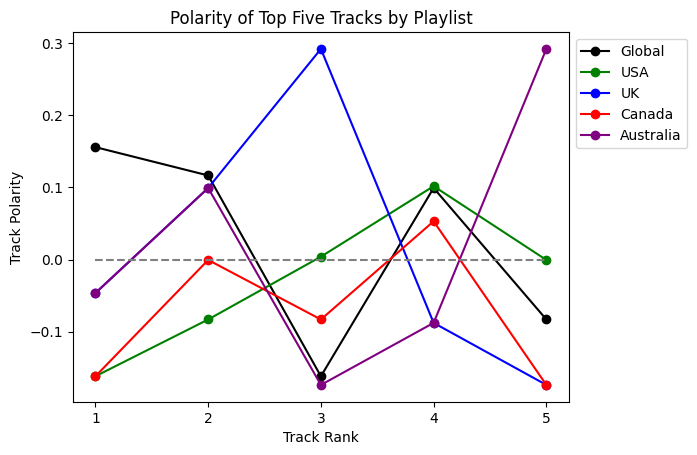

In [137]:
# Plot track polarity vs rank by country

colors = ['black', 'green', 'blue', 'red', 'purple']

for playlist, color in zip(polarities, colors):
    plt.plot(playlist, color = color, marker = 'o')
plt.title('Polarity of Top Five Tracks by Playlist')
plt.xlabel('Track Rank')
plt.ylabel('Track Polarity')
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = [1, 2, 3, 4, 5])
plt.hlines(y = 0, xmin = 0, xmax = 4, color = 'gray', linestyles = 'dashed')
plt.legend(playlists, bbox_to_anchor = (1.0, 1.0))
plt.show()

In [68]:
# Calculate average polarity for each playlist
average_polarities = [round(np.mean(polarity_list), 4) for polarity_list in polarities]
print(list(zip(playlists, average_polarities)))

[('Global', 0.0254), ('USA', -0.0279), ('UK', 0.0167), ('Canada', -0.0732), ('Australia', 0.0167)]


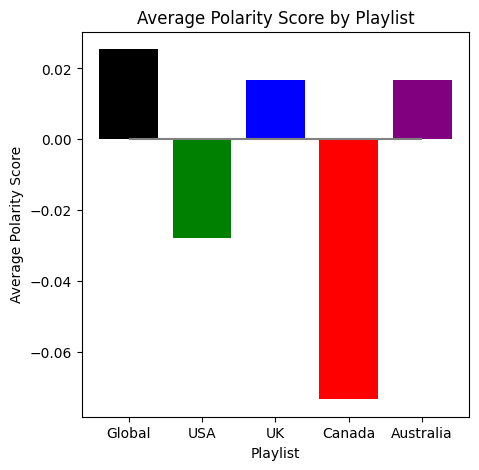

In [84]:
# Plot average polarities
plt.figure(figsize = (5, 5))
plt.bar(x = playlists, height = average_polarities, color = colors)
plt.title('Average Polarity Score by Playlist')
plt.xlabel('Playlist')
plt.ylabel('Average Polarity Score')
plt.hlines(y = 0, xmin = 0, xmax = 4, color = 'gray')
plt.show()

## Conclusions

There are 13 unique songs out of 25 tracks from the 5 playlists analyzed. The UK and Australia had the same 5 top tracks, just in a different order. The playlist with the highest average polarity score was the Top Songs Global playlist, with an average of 0.0254. The lowest average polarity score was the Top Songs Canada playlist with an average of -0.0732. Only the USA and Canada had negative average scores. Out of all five playlists, only Top Songs Global has a track with a positive polarity score in the top spot for this week. The song with the highest polarity score was "Dance The Night" by Dua Lipa, which appeared in both the UK and Australia playlists. The song with the lowest polarity score was "MELTDOWN" by Travis Scott, which appeared in the Global, USA, and Canada playlists. Travis Scott appeared in the top 5 tracks the most often at 8 times. "What Was I Made For?" br Billie Eilish, "Barbie World" by Nicki Minaj, and "FE!N" by Travis Scott all appeared in 3 of the 5 playlists.